In [38]:


import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, ELU
import numpy as np

from matplotlib import pyplot
import matplotlib

import sys



In [39]:
py_ver = sys.version;
tf_ver = tf.version.VERSION;
np_ver = np.version.version;
mp_ver = matplotlib.__version__;



required_py_ver = "3.9.5";
required_tf_ver = "2.5.0";
required_np_ver = "1.19.5";
required_mp_ver = "3.4.2";

print(f'Using python version: {py_ver}');
print(f'Using TensorFlow version: {tf_ver}');
print(f'Using numpy version: {np_ver}');
print(f'Using matplotlib version: {mp_ver}');

if not(py_ver[:5] == required_py_ver and tf_ver == required_tf_ver and np_ver == required_np_ver and mp_ver == required_mp_ver ):
    pass;
    raise Exception(f"\nIncorrect versions!\n\nShould be:\nPython: {required_py_ver}\nTensorFlow: {required_tf_ver}\nNumpy: {required_np_ver} \nMatplotlib: {required_mp_ver}");
  


Using python version: 3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]
Using TensorFlow version: 2.5.0
Using numpy version: 1.19.5
Using matplotlib version: 3.4.2


In [40]:
x_set = [];
x_train = [];
x_test = [];

y_set = [];
y_train = [];
y_test = [];

training_point_number = 0;

def loadData():
    global x_set;
    global x_train;
    global x_test;
    global y_set;
    global y_train;
    global y_test;
    global training_point_number;
    # load in the data 
    full_dataset = np.load("ml_dataset.npy");

    # split up the data into the x and y halves
    x_set = full_dataset[0];
    y_set = full_dataset[1];


    # split the data into training and testing sets
    half = int(len(x_set)/2);

    print(f'half: {half}');



    x_train = x_set[::2];
    x_test = x_set[1::2];

    y_train = y_set[::2];
    y_test = y_set[1::2];


    # print some data diagnostics to ensure we correctly obtained data sets

    print(f"x_set shape: {x_set.shape}");
    print(f"y_set shape: {y_set.shape}");


    training_point_number = x_set.shape[1];
    print(f"number of points in each graph set: {training_point_number}");


    print("number of x training data sets:");
    print(len(x_train[0:]));


    print("number of y training data sets:");
    print(len(y_train[0:]));

    assert(len(x_train) == len(y_train));
    assert(len(x_test) == len(y_test));
    assert(x_set.shape == y_set.shape);

    print(f"\nNumber of training graph-solution sets: {len(x_train)}")


    print(f"Number of testing graph-solution sets: {len(x_test)}")



    print(f"\nDataset shape: {x_set.shape}")
    
    # reshape the x data into a column of 1 element rows for the LSTM


    x_train = x_train.reshape(x_train.shape[0],training_point_number,1);
    x_test = x_test.reshape(x_test.shape[0],training_point_number,1);


In [41]:
loadData();

half: 1750
x_set shape: (3500, 500)
y_set shape: (3500, 500)
number of points in each graph set: 500
number of x training data sets:
1750
number of y training data sets:
1750

Number of training graph-solution sets: 1750
Number of testing graph-solution sets: 1750

Dataset shape: (3500, 500)


In [42]:

print(x_train.shape)

(1750, 500, 1)


In [43]:
#build the model by stacking layers


model = tf.keras.models.Sequential()

model.add(LSTM(training_point_number));


model.add(Dense(training_point_number,activation='tanh'));

model.add(Dense(training_point_number,activation='exponential'));


print("model built");


model built


In [44]:
print(y_train[0])

[  218.1661565    261.44962242   304.73308834   348.01655426
   391.30002017   434.58348609   477.86695201   521.15041793
   564.43388385   607.71734977   651.00081569   694.2842816
   737.56774752   780.85121344   824.13467936   867.41814528
   910.7016112    953.98507712   997.26854304  1040.55200895
  1083.83547487  1127.11894079  1170.40240671  1213.68587263
  1256.96933855  1300.25280447  1343.53627039  1386.8197363
  1430.10320222  1473.38666814  1516.67013406  1559.95359998
  1603.2370659   1646.52053182  1689.80399773  1733.08746365
  1776.37092957  1819.65439549  1862.93786141  1906.22132733
  1949.50479325  1992.78825917  2036.07172508  2079.355191
  2122.63865692  2165.92212284  2209.20558876  2252.48905468
  2295.7725206   2339.05598652  2382.33945243  2425.62291835
  2468.90638427  2512.18985019  2555.47331611  2598.75678203
  2642.04024795  2685.32371387  2728.60717978  2771.8906457
  2815.17411162  2858.45757754  2901.74104346  2945.02450938
  2988.3079753   3031.5914412

In [45]:
# get the predictions for the second datapoint
predictions = model(x_train)

# print the raw predictions for that datapoint. Note that these are "logits" or "log-odds" scores, which is related to the probability, 
# and also is the inverse of the sigmoid function
print("logits prediction: ");
print(predictions[0]);

# we can use the softmax function to convert these logits to probabilities for each preciction class
#print("odds prediction: ");
#print(tf.nn.softmax(predictions).numpy()[0]);


print(f'shape: {predictions.shape}');


logits prediction: 
tf.Tensor(
[0.99999976 0.9999987  0.99999934 1.0000006  1.0000001  1.0000001
 1.         0.99999976 0.9999995  1.0000004  1.0000001  0.9999996
 1.0000002  0.99999976 0.9999994  1.0000027  0.99999994 1.0000002
 1.0000005  1.0000001  1.0000012  0.9999995  0.9999998  0.9999992
 0.9999998  0.9999995  1.0000001  1.0000004  1.0000001  1.0000004
 0.99999964 0.99999976 0.9999992  1.         1.0000007  0.9999987
 1.0000006  1.000001   1.0000007  1.0000013  1.0000001  1.0000005
 0.9999997  1.0000002  0.99999994 1.0000001  1.0000008  0.99999934
 1.         0.9999986  1.0000006  0.99999964 0.99999946 0.99999833
 0.99999976 1.0000011  0.9999982  1.0000005  1.0000004  1.0000002
 0.9999998  1.0000002  1.0000001  1.0000007  1.0000012  0.99999934
 1.0000005  1.0000008  0.9999997  0.9999996  1.0000008  0.9999988
 0.9999999  1.000001   1.0000012  1.0000001  0.9999987  0.99999964
 0.99999845 1.0000006  1.000001   0.99999976 1.         0.9999999
 1.0000007  1.0000008  1.0000008  1.     

In [46]:
# get the loss function as a MeanSquaredError loss from tf.keras.losses. 
loss_fn = tf.keras.losses.MeanSquaredError();

print("loss:");
print(loss_fn(y_train[0],predictions[0]).numpy());

loss:
160391100.0


In [47]:
opt = tf.keras.optimizers.Adam(learning_rate=5e-6);

model.compile(loss=loss_fn,optimizer=opt,metrics=['accuracy']);


In [48]:

print(model.summary());

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1750, 500)               1004000   
_________________________________________________________________
dense (Dense)                (1750, 500)               250500    
_________________________________________________________________
dense_1 (Dense)              (1750, 500)               250500    
Total params: 1,505,000
Trainable params: 1,505,000
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
num_epochs = 30;
model.fit(x_train,y_train,epochs=num_epochs,validation_data=(x_test,y_test), batch_size=10);

Epoch 1/40
175/175 [==============================] - 486s 3s/step - loss: 13293344.0000 - accuracy: 0.0000e+00 - val_loss: 13219312.0000 - val_accuracy: 0.0000e+00
Epoch 2/40
175/175 [==============================] - 424s 2s/step - loss: 13109404.0000 - accuracy: 0.0000e+00 - val_loss: 12825200.0000 - val_accuracy: 0.0000e+00
Epoch 3/40
175/175 [==============================] - 423s 2s/step - loss: 12160114.0000 - accuracy: 0.0000e+00 - val_loss: 10949289.0000 - val_accuracy: 0.0000e+00
Epoch 4/40
175/175 [==============================] - 422s 2s/step - loss: 9128486.0000 - accuracy: 0.0000e+00 - val_loss: 7481756.0000 - val_accuracy: 0.0000e+00
Epoch 5/40
175/175 [==============================] - 422s 2s/step - loss: 7054397.5000 - accuracy: 0.3383 - val_loss: 6851405.0000 - val_accuracy: 1.0000
Epoch 6/40
175/175 [==============================] - 424s 2s/step - loss: 6878514.0000 - accuracy: 0.6880 - val_loss: 6835621.5000 - val_accuracy: 1.0000
Epoch 7/40
175/175 [============

In [59]:
model.save(f'saved_model/LSTM_mk3');

INFO:tensorflow:Assets written to: saved_model/LSTM_mk3\assets


INFO:tensorflow:Assets written to: saved_model/LSTM_mk3\assets


In [58]:
model.save(f'saved_model/LSTM_mk3_p123_{y_set.shape[0]}pt_{num_epochs}_epoch');

NameError: name 'num_epochs' is not defined

In [56]:
# reimport in case we are starting execution from here
import tensorflow as tf
from matplotlib import pyplot
import numpy as np;

In [57]:
model = tf.keras.models.load_model('saved_model/LSTM_mk3');


loadData();

INFO:tensorflow:Assets written to: saved_model/LSTM_mk3_p2_3500pt_norm_model_40_epoch\assets


INFO:tensorflow:Assets written to: saved_model/LSTM_mk3_p2_3500pt_norm_model_40_epoch\assets


half: 1750
x_set shape: (3500, 500)
y_set shape: (3500, 500)
number of points in each graph set: 500
number of x training data sets:
1750
number of y training data sets:
1750

Number of training graph-solution sets: 1750
Number of testing graph-solution sets: 1750

Dataset shape: (3500, 500)


In [53]:
predictions = model(x_test);

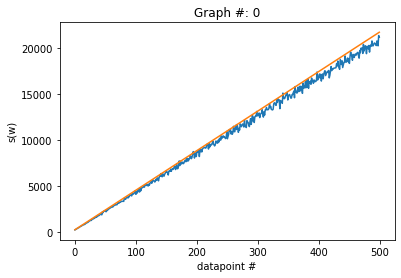

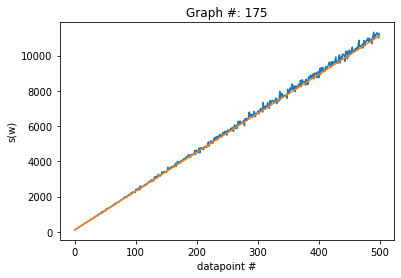

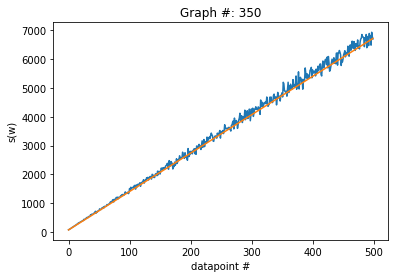

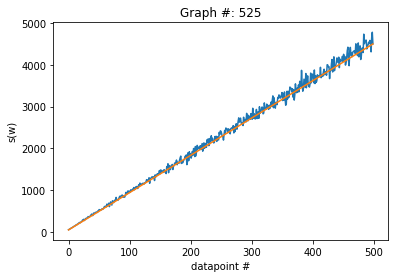

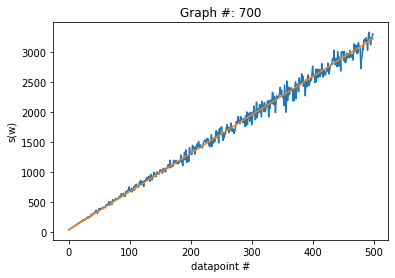

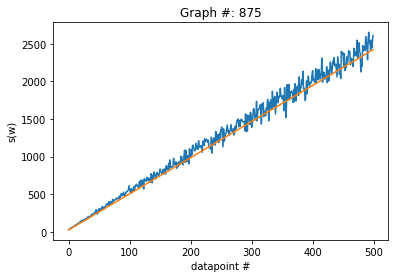

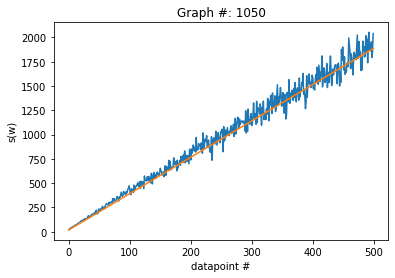

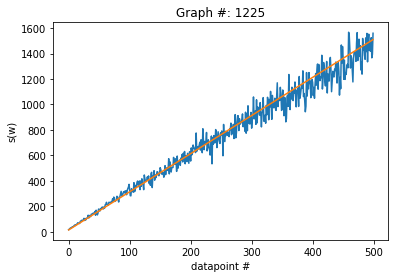

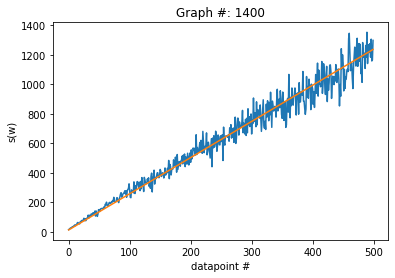

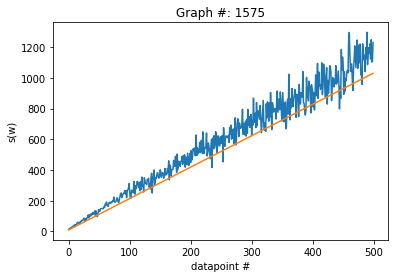

<Figure size 432x288 with 0 Axes>

In [54]:


for graphnum in range(0,predictions.shape[0],int(predictions.shape[0]/30)):
    pyplot.title(f"Graph #: {graphnum}")
    pyplot.xlabel(f"datapoint #");
    pyplot.ylabel(f"s(w)");
    
    first_graph = predictions[graphnum];

    x = np.linspace(0,500,500);
    

    pyplot.plot(first_graph);
    pyplot.plot(y_test[graphnum])
    pyplot.figure();

In [55]:
print(first_graph)

tf.Tensor(
[  13.39272    17.090511   20.715023   23.948929   21.302258   26.915663
   32.697918   32.25796    35.921757   39.236107   44.173645   38.076405
   43.61476    45.475067   57.59448    60.55626    56.497524   51.88147
   49.702927   64.23453    62.86918    72.295074   70.60797    73.7829
   76.41046    87.63369    71.80724    83.47205    69.79155    85.47265
   86.55975    91.85167   107.70948    88.601814  107.91347   104.05016
   99.73119   116.52932   108.50209   113.79536   124.46988   112.760864
  117.315994  134.85776    99.92874   133.54802   107.15285    97.08582
  113.52523   142.32106   137.48132   131.01863   146.66556   148.77934
  150.38553   149.96968   147.84857   149.08913   162.36348   157.03796
  178.46907   170.80539   192.12392   174.16476   166.23926   163.52202
  184.71152   190.83032   183.19414   182.73785   192.1131    189.57655
  199.66954   195.82384   223.26035   194.55534   190.58253   193.48271
  199.633     219.15204   216.8269    193.98572   1